# TP 3 Machine Learning
# Classification bayésienne
## $ Auteur: $
### $ Koussaila$ $KADI$ 
### $ kadi.koussaila@outlook.fr $

In [1]:
import numpy as np
import pylab as plt
import math

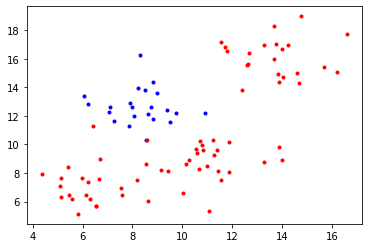

In [2]:
[X_train, y_train, X_test, y_test] = np.load("TP4.npy",allow_pickle=True)
#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))
#Pixel non peau
F_train = X_train[np.where(y_train==0),:]
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))
plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.show
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show()

# **Estimation des DDP**

### Ecrire la fonction ddp_parzen

In [3]:
def norm2(x, m, cov):
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p

In [4]:
def ddp_parzen(x,X,cov):
  N,s=X.shape[0],0
  for i in range (N):
    s+=norm2(x,X[i],cov)
  s/=N
  return s

### Estimer la DDp en tout point d'une grille carrée 

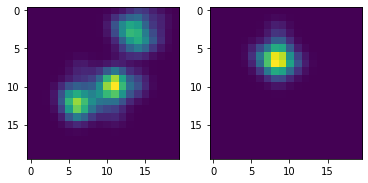

In [5]:
p_chair,p_non_chair=np.zeros([20,20]),np.zeros([20,20])
sigma=1
cov=(sigma**2)*np.eye(2)
for x in range(20):
  for y in range(20):
    p_chair[y,x]=ddp_parzen(np.array([x,y]),T_train,cov)
    p_non_chair[y,x]=ddp_parzen(np.array([x,y]),F_train,cov)

plt.subplot(1,2,1)
plt.imshow(np.flipud(p_chair))
plt.subplot(1,2,2)
plt.imshow(np.flipud(p_non_chair))
plt.show()

**On ne calcule pas les probabilité pour la base de test mais pour tous les points se trouvant sur d'un carré de longeur $20 \Rightarrow$ On aura donc $400$ pts d'ou chaque matrice $p_{chair}$ et $p_{nonchair}$ sera de taille $20*20$**

# **Classification Bayésienne**

### DDP à priori de chaque classe

In [6]:
print("La DDP à priori de P_chair est",T_train.shape[0]/X_train.shape[0])
print("La DDP à priori de P_non_chair est",F_train.shape[0]/X_train.shape[0])

La DDP à priori de P_chair est 0.7555555555555555
La DDP à priori de P_non_chair est 0.24444444444444444


### Classification en utilisant la règle de Bayes

In [7]:
tau,c=[],[]
p1,p0=T_train.shape[0]/X_train.shape[0],F_train.shape[0]/X_train.shape[0]


#Calculer les DDP cette fois ci sur la base de test
d=np.linspace(start=0.5,stop=10,num=20) #pour génerer un vecteur de 0.5 à 10 par pas de 0.5
for l in range (20):
  sigma=d[l]
  c.append(sigma)
  cov=(sigma**2)*np.eye(2)
  p_chair,p_non_chair=[],[]
  y_pred=[]
  for i in range (X_test.shape[0]):
    cb,cr=X_test[i][0],X_test[i][1]
    p_chair.append(ddp_parzen(X_test[i],T_train,cov))
    p_non_chair.append(ddp_parzen(X_test[i],F_train,cov))
    
    #Classification
    if (p_chair[i]*p1>=p_non_chair[i]*p0): y_pred.append(1)
    else : y_pred.append(0)
    
  #taux de reconnaissance 
  from sklearn.metrics import accuracy_score
  tau.append(accuracy_score(y_test, y_pred))

### Afficher le taux de reconnaissance

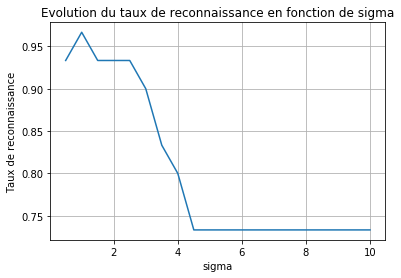

In [8]:
plt.plot(c,tau)
plt.grid()
plt.xlabel('sigma')
plt.ylabel('Taux de reconnaissance')
plt.title('Evolution du taux de reconnaissance en fonction de sigma')
plt.show()

On obtient la meilleure classification pour $sigma=1$ 